In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Customers.csv")
data

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [5]:
data.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
data.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [10]:
# Handling datetime conversions
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [12]:
data['SignupYear'] = data['SignupDate'].dt.year
data['SignupMonth'] = data['SignupDate'].dt.month
data

,CustomerID,CustomerName,Region,SignupDate,SignupYear,SignupMonth
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,7
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022,2
2,C0003,Michael Rivera,South America,2024-03-07,2024,3
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022,10
4,C0005,Laura Weber,Asia,2022-08-15,2022,8
...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,2022,6
196,C0197,Christina Harvey,Europe,2023-03-21,2023,3
197,C0198,Rebecca Ray,Europe,2022-02-27,2022,2
198,C0199,Andrea Jenkins,Europe,2022-12-03,2022,12


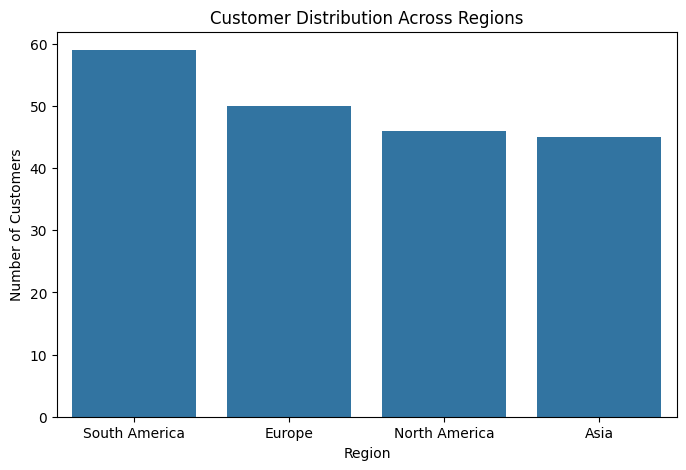

In [23]:
# Distribution of customers across regions
region_counts = data['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Customer Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

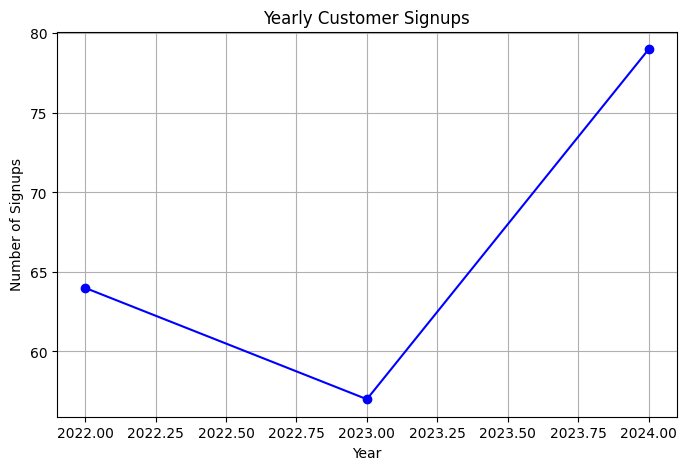

In [19]:
yearly_trend = data.groupby('SignupYear').size()
plt.figure(figsize=(8, 5))
yearly_trend.plot(kind='line', marker='o', title='Yearly Customer Signups', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()

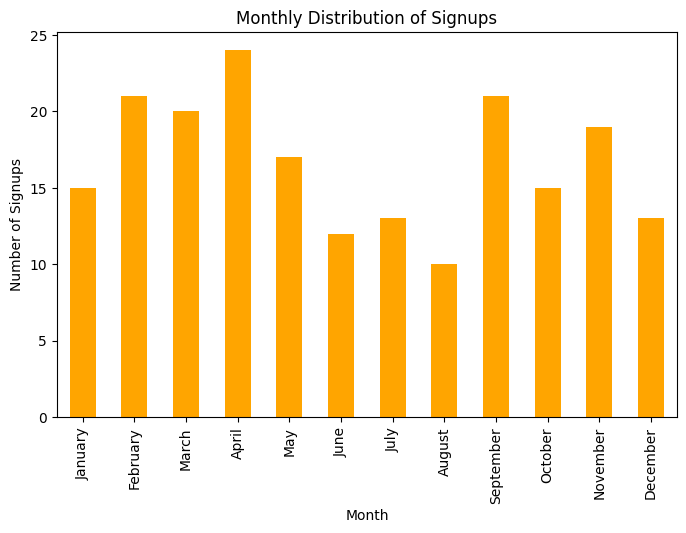

In [21]:
month_name_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_trend = data.groupby('SignupMonth').size()
monthly_trend.index = monthly_trend.index.map(month_name_mapping)
plt.figure(figsize=(8, 5))
monthly_trend.plot(kind='bar', color='orange')
plt.title('Monthly Distribution of Signups')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()

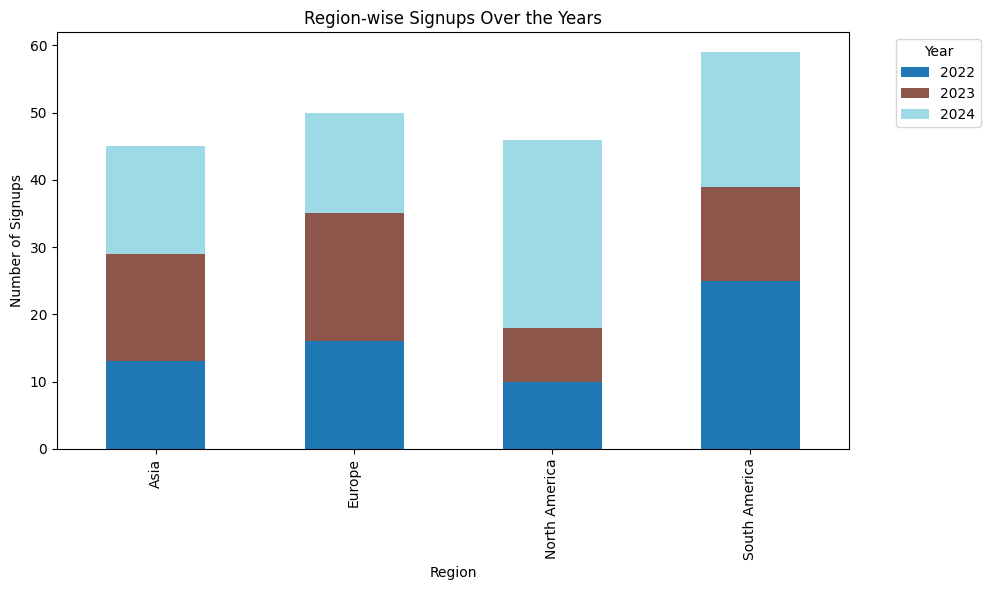

In [22]:
region_yearly = data.groupby(['Region', 'SignupYear']).size().unstack()
region_yearly.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Region-wise Signups Over the Years')
plt.xlabel('Region')
plt.ylabel('Number of Signups')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()